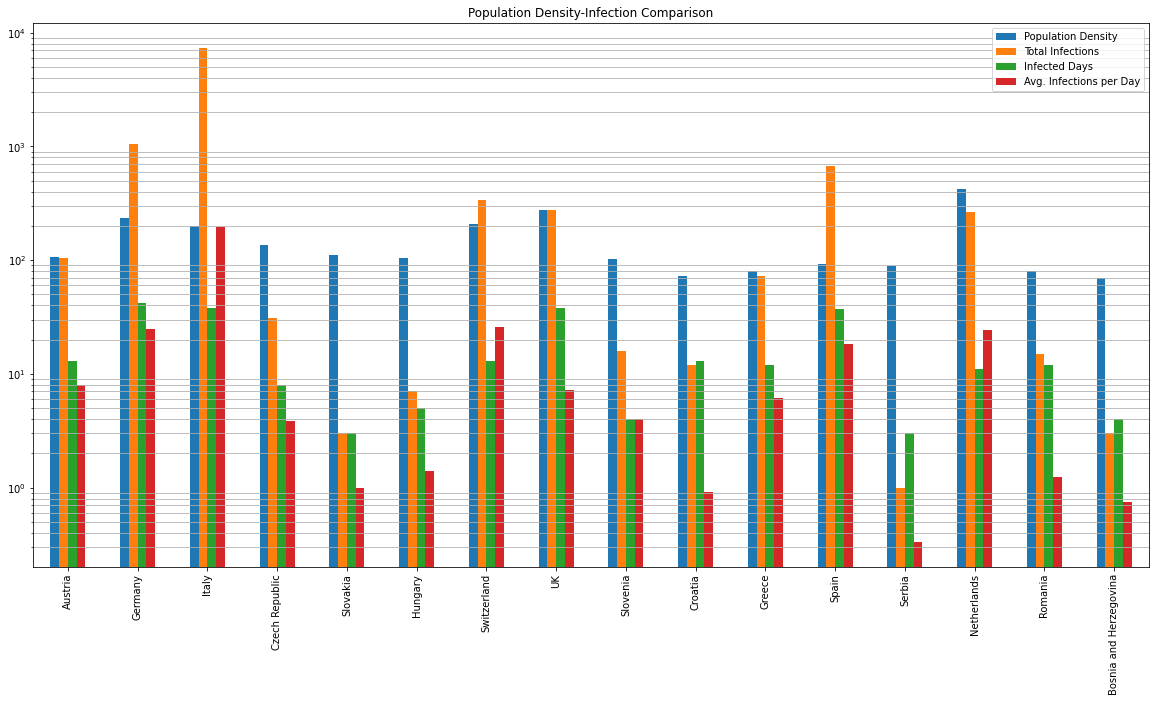

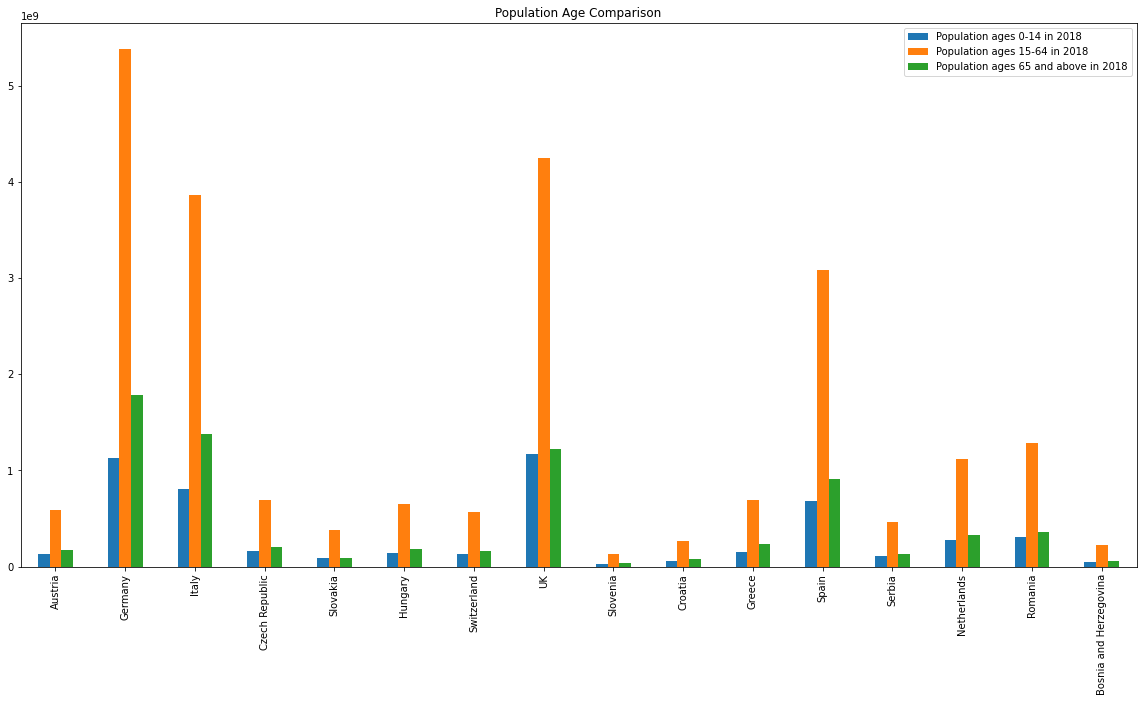

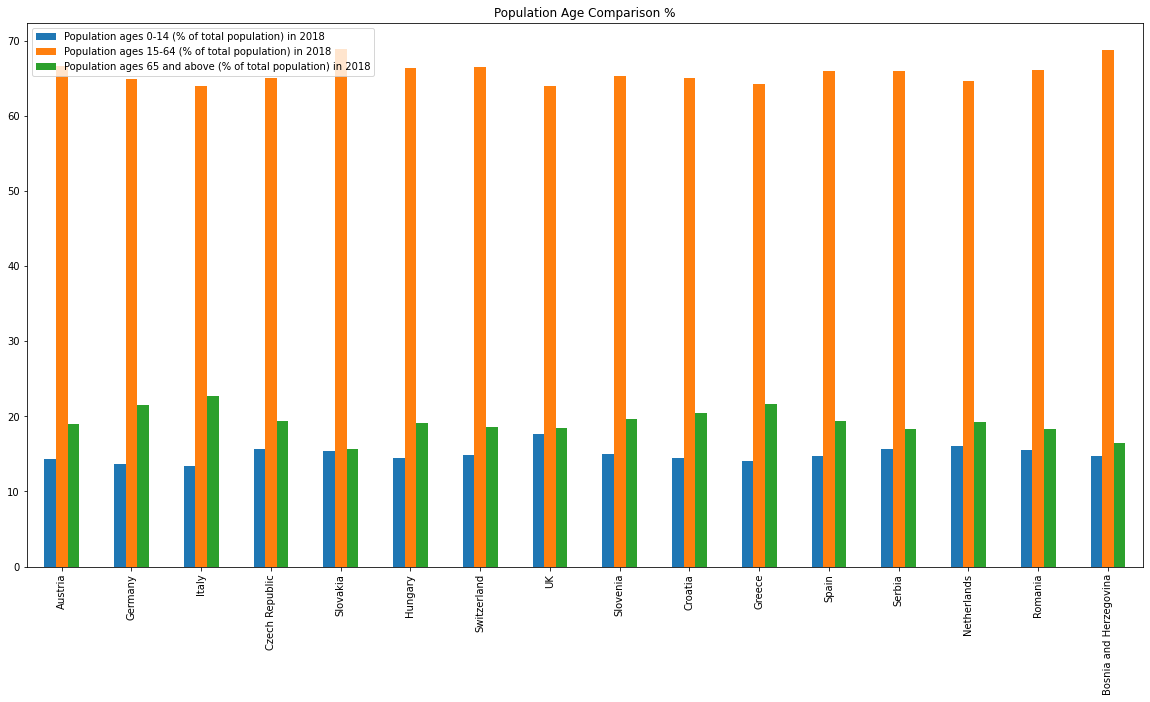

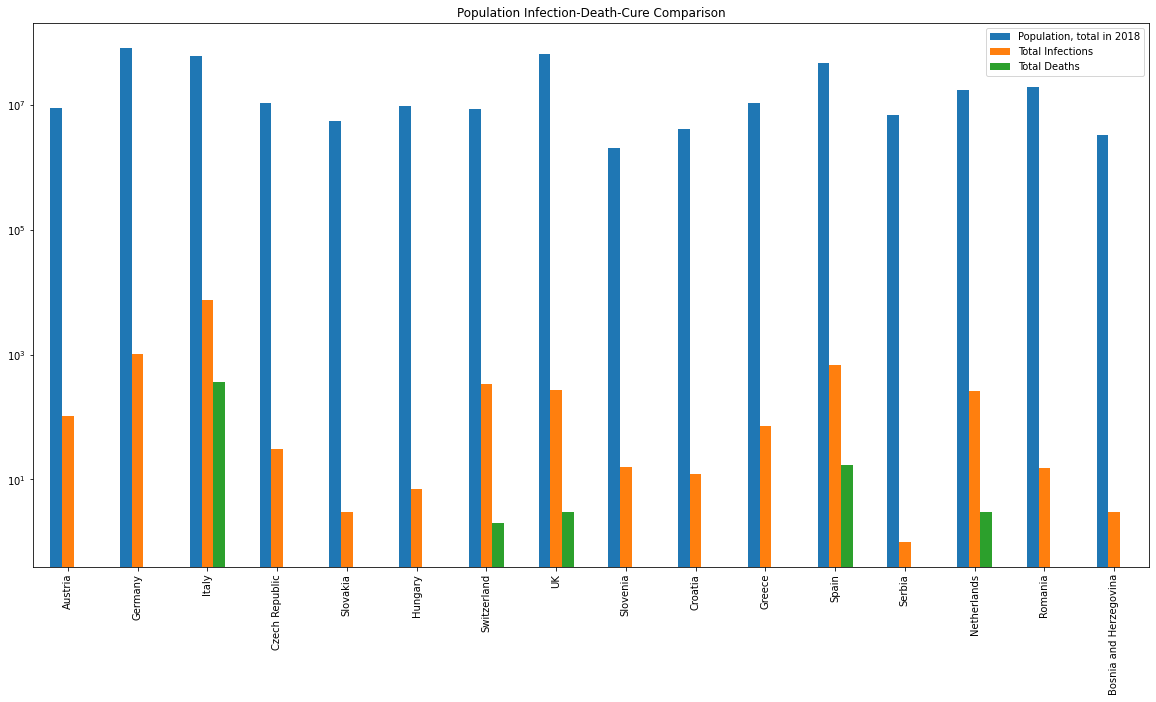

In [1]:
import pandas
import data
import os
import lib.csse_covid_19_dataset.io as io
import lib.csse_covid_19_dataset.data_processing as data_processing

df_pop = pandas.concat([pandas.DataFrame.from_dict(data.population), 
                        pandas.DataFrame.from_dict(data.country_population_density)], axis=1)
df_pop.dropna(inplace=True)

df_pop_abs = df_pop['Population, total in 2018']

df_pop['Population ages 0-14 in 2018'] = df_pop['Population ages 0-14 (% of total population) in 2018'] * df_pop_abs
df_pop['Population ages 15-64 in 2018'] = df_pop['Population ages 15-64 (% of total population) in 2018'] * df_pop_abs
df_pop['Population ages 65 and above in 2018'] = df_pop['Population ages 65 and above (% of total population) in 2018'] * df_pop_abs

#print(df_pop)
# infections in syria and turkey at the moment
df_pop.drop(index=[data.sy, data.tr], inplace=True)
#print(df_pop)

df_csse_covid_19_dataset_confirmed_infections = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', infer_datetime_format=True, parse_dates=True)
df_confirmed = data_processing.getCasesPerDayAndCountry(df_csse_covid_19_dataset_confirmed_infections)
df_confirmed = data_processing.selectCountries(df_confirmed, df_pop.index.values)

df_csse_covid_19_dataset_deaths = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', infer_datetime_format=True, parse_dates=True)
df_deaths = data_processing.getCasesPerDayAndCountry(df_csse_covid_19_dataset_deaths)
df_deaths = data_processing.selectCountries(df_deaths, df_pop.index.values)

latest_data_date = df_confirmed.index[-1].strftime("%Y-%m-%d")
    
directory = "export/{}/".format(latest_data_date)
if not os.path.exists(directory):
    os.makedirs(directory)
    

df_pop['Infected Days'] = df_confirmed.astype(bool).sum(axis=0)
df_pop['Total Infections'] = df_confirmed.max(axis=0)
df_pop['Total Deaths'] = df_deaths.max(axis=0)

df_pop['Avg. Infections per Day'] = df_pop['Total Infections'] / df_pop['Infected Days']
#print(df_pop)

## Per country stats
title = "Population Density-Infection Comparison"
df_density = df_pop[['Population Density', 'Total Infections', 'Infected Days', 'Avg. Infections per Day']]
io.saveDataCsv(df_density, directory, title)
io.plotAndSavePng(df_density, title, (20, 10), True, directory, title, 'bar')

title = "Population Age Comparison"
df_age = df_pop[['Population ages 0-14 in 2018', 'Population ages 15-64 in 2018', 'Population ages 65 and above in 2018']]
io.saveDataCsv(df_age, directory, title)
io.plotAndSavePng(df_age, title, (20, 10), False, directory, title, 'bar')

title = "Population Age Comparison %"
df_age_pct = df_pop[['Population ages 0-14 (% of total population) in 2018', 'Population ages 15-64 (% of total population) in 2018', 'Population ages 65 and above (% of total population) in 2018']]
io.saveDataCsv(df_age_pct, directory, title)
io.plotAndSavePng(df_age_pct, title, (20, 10), False, directory, title, 'bar')

title = "Population Infection-Death-Cure Comparison"
df_desease = df_pop[['Population, total in 2018', 'Total Infections', 'Total Deaths']]
io.saveDataCsv(df_desease, directory, title)
io.plotAndSavePng(df_desease, title, (20, 10), True, directory, title, 'bar')